In [1]:
import numpy as np
import matplotlib.pyplot as plt
import struct

import qiskit
from qiskit import *

In [2]:
# float to binary 
def float_to_bin(num):
    return format(struct.unpack('!I', struct.pack('!f', num))[0], '032b')

In [3]:
visibilities = np.zeros((1, 1), dtype='float32')
visibilities[0][0] = 6
print(visibilities)

[[6.]]


In [4]:
# encoding binary data onto qubits
def binary_encode(qc, binary, off_set):
    
    for i in range(0, len(binary)):
        qc.reset(off_set+i) # set quantum state |0> by default for all qubits

        if binary[i]=='1':
            qc.x(off_set+i) # act as a CX (controlled X gate)
    
    off_set += len(binary)

    return off_set

In [5]:
n = visibilities.shape[0] * visibilities.shape[1]
off_set = 0

qc = QuantumCircuit(n*32)
for i in range(0, visibilities.shape[0]):
    for j in range(0, visibilities.shape[1]):
            binary = float_to_bin(visibilities[i][j])
            off_set = binary_encode(qc, binary, off_set)

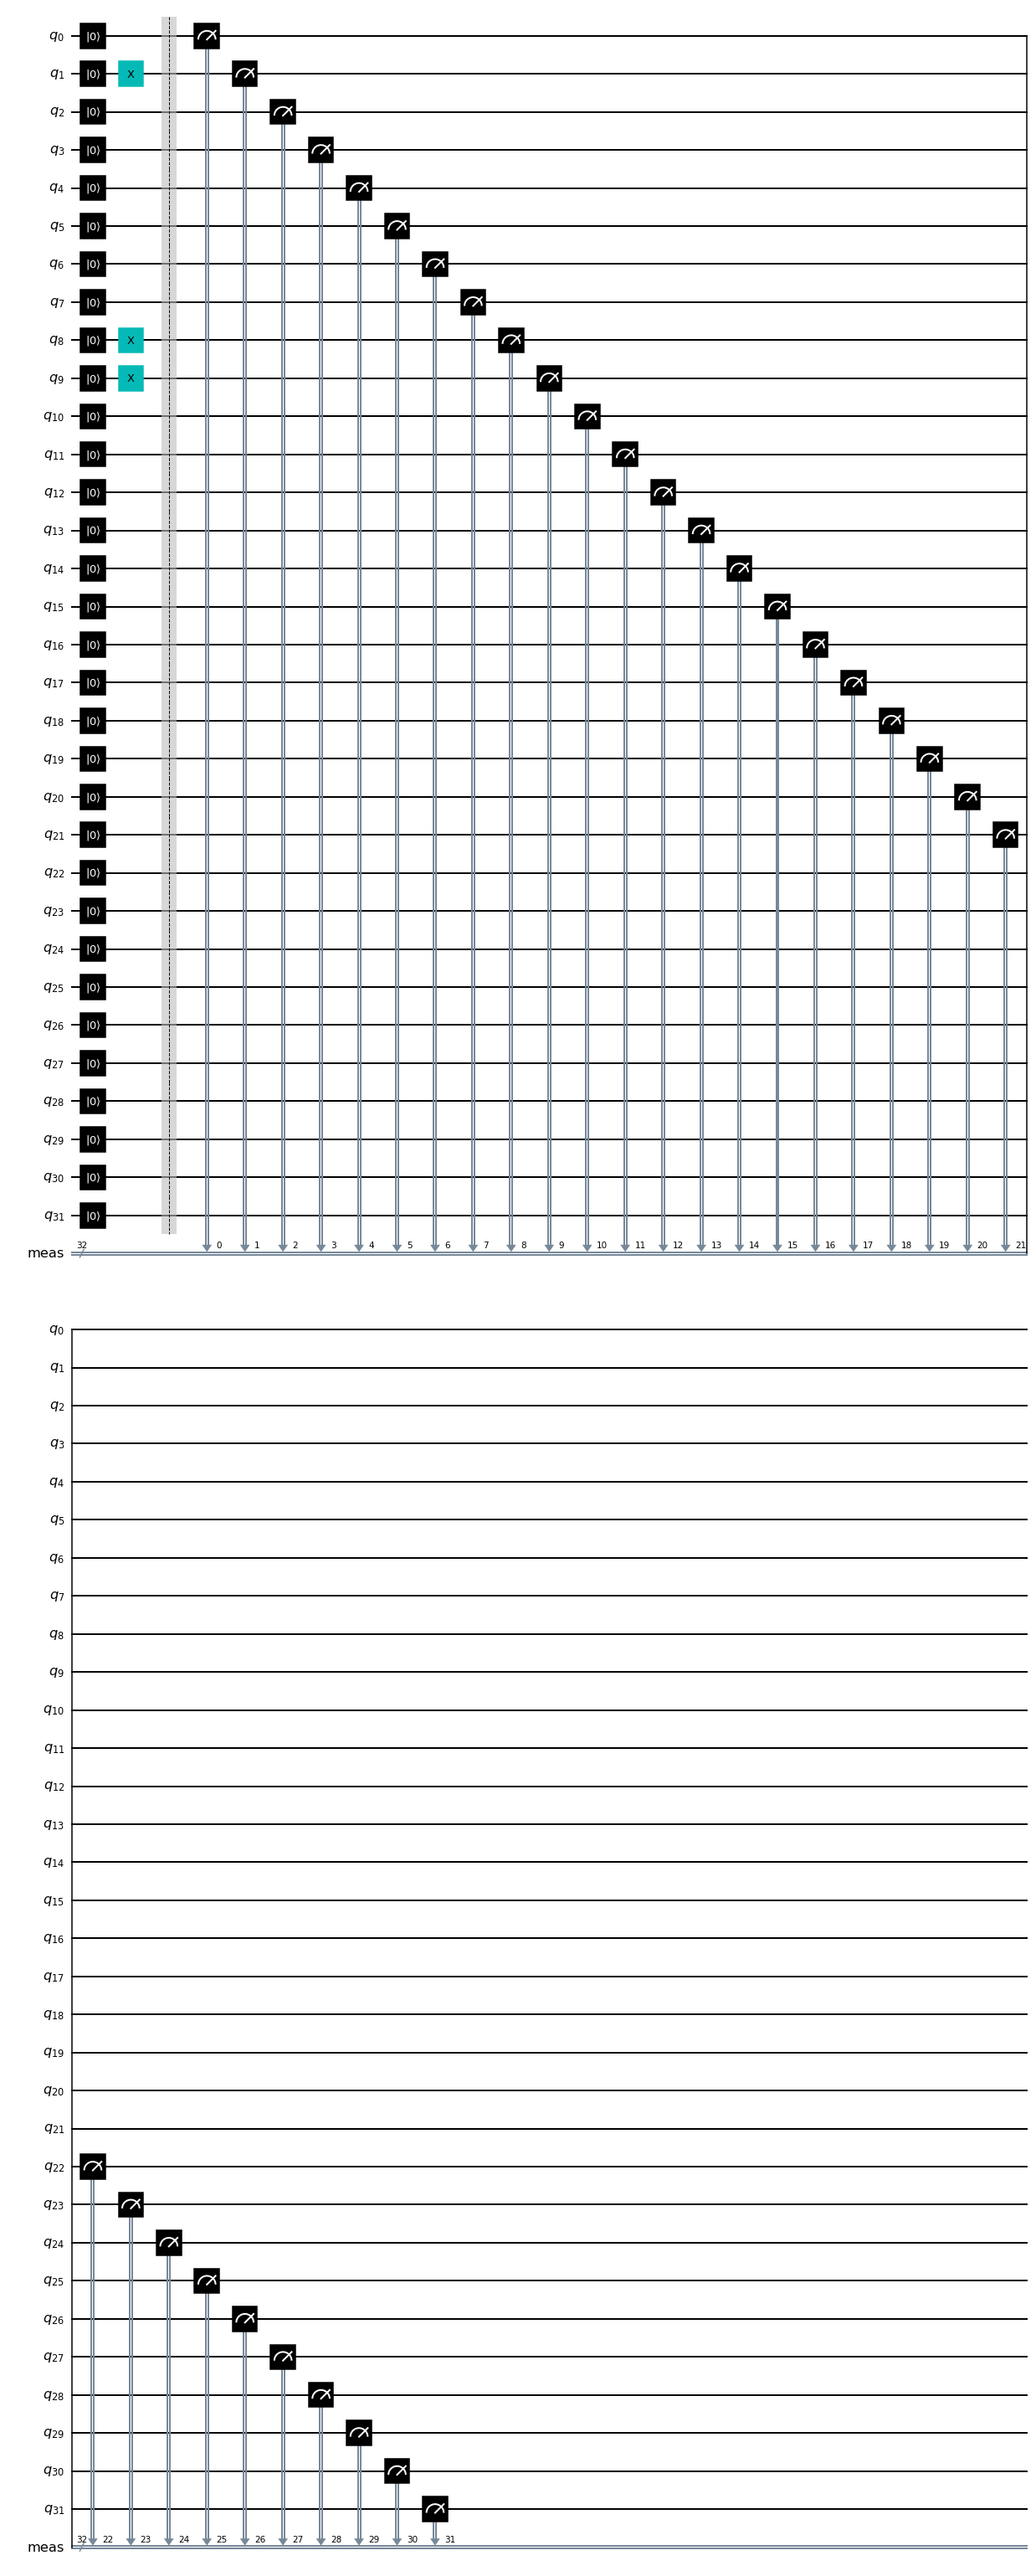

In [6]:
qc.draw('mpl')
qc.measure_all()
backend = Aer.get_backend('aer_simulator') # Qiskit's staple simulator (CHOICE MOTIVATION?)
job = backend.run(qc, shots=1, memory=True) 
output = job.result().get_memory()[0]
qc.draw('mpl')